<a href="https://colab.research.google.com/github/matheusapostulo/diabetes-machine-learning/blob/main/Diabetes_Machine_Learning_(diabetes_binary_imbalance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Exploration and Visualization

In [6]:
diabetes_dataframe = pd.read_csv('diabetes_binary.csv')

In [7]:
diabetes_dataframe
# Showing the dataset 

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [4]:
diabetes_dataframe.describe()
# Dataset description

NameError: ignored

In [5]:
diabetes_dataframe.tail()

NameError: ignored

In [8]:
## Checking duplicate rows
diabetes_dataframe.duplicated()
diabetes_dataframe.duplicated().sum()

24206

In [9]:
## Checkin non-duplicate rows
(~diabetes_dataframe.duplicated()).sum()

229474

## Triyng to find outliers 

In [ ]:
# Function for find outliers at the dataframe. This function shows and returns.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   if len(outliers) > 0 and ((df.max() + df.min())/2 != 0.5) :
      print(f'{df.name} have {len(outliers)} possibles outlier! Max_valor = {df.max()} | Min_valor = {df.min()}')
      return df.name   

In [ ]:
# Testing "find_outliers_IQR" in all dataset columns
# Defining a list for all columns
all_columns = diabetes_dataframe.iloc[:, 1:22]

# Defining a list for all columns that've outliers
all_columns_outliers = []
# Calling the function with all columns
for i in all_columns:
 outlier = find_outliers_IQR(diabetes_dataframe[i])
 if outlier != None:
  all_columns_outliers.append(outlier)
 
all_columns_outliers

BMI have 9847 possibles outlier! Max_valor = 98.0 | Min_valor = 12.0
GenHlth have 12081 possibles outlier! Max_valor = 5.0 | Min_valor = 1.0
MentHlth have 36208 possibles outlier! Max_valor = 30.0 | Min_valor = 0.0
PhysHlth have 40949 possibles outlier! Max_valor = 30.0 | Min_valor = 0.0


['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [ ]:
# Showing the outliers in graph form
fig = px.box(diabetes_dataframe, y=all_columns_outliers[0])
fig.show()

In [ ]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[1])
fig.show()

In [ ]:
diabetes_dataframe['GenHlth'][diabetes_dataframe['GenHlth']>=4].count()

43651

In [ ]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[2])
fig.show()

In [ ]:
fig = px.box(diabetes_dataframe, y=all_columns_outliers[3])
fig.show()

In [ ]:
diabetes_dataframe.loc[diabetes_dataframe['BMI']>=92]

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
19816            2.0     1.0       1.0        1.0  92.0     0.0     0.0   
36324            1.0     1.0       0.0        1.0  96.0     0.0     0.0   
76317            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
76353            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76362            2.0     0.0       1.0        1.0  92.0     1.0     0.0   
76366            0.0     0.0       1.0        0.0  95.0     1.0     0.0   
76370            0.0     0.0       1.0        0.0  98.0     1.0     0.0   
76371            0.0     1.0       1.0        1.0  95.0     1.0     0.0   
76373            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76394            2.0     1.0       1.0        1.0  98.0     1.0     0.0   
76396            2.0     1.0       1.0        1.0  98.0     1.0     1.0   
76410            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
76431            2.0     0.0       1.0        1.0  92.0     0.0     0.0   
76447            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76454            2.0     1.0       1.0        1.0  92.0     1.0     0.0   
76466            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76468            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
76472            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76474            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
76500            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
76527            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76532            0.0     1.0       1.0        1.0  98.0     0.0     1.0   
76554            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79338            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
79349            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
79350            0.0     0.0       0.0        1.0  95.0     1.0     0.0   
79359            0.0     0.0       1.0        1.0  92.0     1.0     0.0   
79373            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
79378            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
79386            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79392            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79401            0.0     1.0       0.0        1.0  92.0     0.0     1.0   
79403            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79417            2.0     0.0       0.0        1.0  92.0     0.0     0.0   
79418            0.0     0.0       1.0        1.0  95.0     0.0     0.0   
79419            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79437            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79442            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79444            0.0     1.0       0.0        1.0  92.0     1.0     0.0   
79447            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79478            0.0     1.0       1.0        1.0  98.0     0.0     0.0   
79492            2.0     1.0       1.0        1.0  95.0     1.0     0.0   
79495            0.0     0.0       0.0        1.0  92.0     1.0     0.0   
79497            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79507            2.0     0.0       0.0        1.0  98.0     0.0     0.0   
79522            0.0     1.0       0.0        1.0  95.0     0.0     0.0   
79535            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
79544            0.0     0.0       1.0        1.0  95.0     0.0     0.0   
79554            0.0     0.0       1.0        1.0  98.0     1.0     0.0   
123483           0.0     0.0       1.0        1.0  92.0     0.0     0.0   
206389           0.0     1.0       1.0        1.0  95.0     0.0     0.0   
244309           0.0     1.0       1.0        1.0  95.0     0.0     0.0   

        HeartDiseaseorAttack  Ph

In [ ]:
diabetes_dataframe['BMI'][diabetes_dataframe['BMI']>=92].count()

52

## Missing values analysis

In [10]:
diabetes_dataframe.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Predictors and Classes

In [11]:
x_diabetes = diabetes_dataframe.iloc[:, 1:22].values

In [12]:
x_diabetes

array([[1., 1., 1., ..., 9., 4., 3.],
       [0., 0., 0., ..., 7., 6., 1.],
       [1., 1., 1., ..., 9., 4., 8.],
       ...,
       [0., 0., 1., ..., 2., 5., 2.],
       [1., 0., 1., ..., 7., 5., 1.],
       [1., 1., 1., ..., 9., 6., 2.]])

In [13]:
y_diabetes = diabetes_dataframe.iloc[:, 0].values

In [14]:
y_diabetes

array([0., 0., 0., ..., 0., 0., 1.])

# Split of bases into training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_diabetes_training, x_diabetes_test, y_diabetes_training, y_diabetes_test = train_test_split(x_diabetes, y_diabetes, test_size=0.20, random_state=0)

In [17]:
x_diabetes_training.shape #predictors training

(202944, 21)

In [18]:
y_diabetes_training.shape #classes training

(202944,)

In [19]:
x_diabetes_test.shape # predictors test

(50736, 21)

In [20]:
y_diabetes_test.shape # class test

(50736,)

## Save Variables

In [21]:
import pickle

In [22]:
with open('diabetes.pkl', mode = 'wb') as f:
  pickle.dump([x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test],f)

# Bayes Algorithm - 77.66%



In [23]:
with open('diabetes.pkl', 'rb') as f:
  x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test = pickle.load(f)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
naive_diabetes = GaussianNB()

In [26]:
naive_diabetes.fit(x_diabetes_training, y_diabetes_training)

GaussianNB()

In [27]:
predictions_diabetes = naive_diabetes.predict(x_diabetes_test)

In [28]:
predictions_diabetes

array([0., 0., 0., ..., 0., 1., 1.])

In [29]:
y_diabetes_test

array([0., 0., 0., ..., 0., 1., 0.])

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
accuracy_score(y_diabetes_test, predictions_diabetes)

0.7766083254493851

In [32]:
from yellowbrick.classifier import ConfusionMatrix

0.7766083254493851

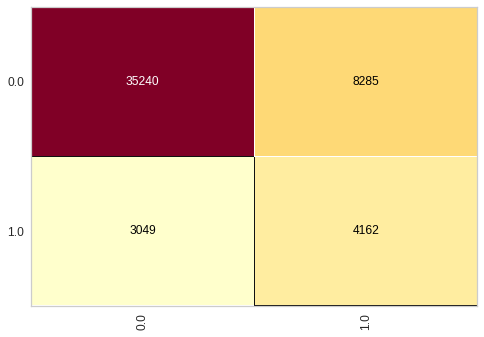

In [33]:
cm = ConfusionMatrix(naive_diabetes)
cm.fit(x_diabetes_training, y_diabetes_training)
cm.score(x_diabetes_test, y_diabetes_test)

In [34]:
print(classification_report(y_diabetes_test, predictions_diabetes))

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43525
         1.0       0.33      0.58      0.42      7211

    accuracy                           0.78     50736
   macro avg       0.63      0.69      0.64     50736
weighted avg       0.84      0.78      0.80     50736



# Random Forest - 85.78%

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
with open('diabetes.pkl', 'rb') as f:
  x_diabetes_training, y_diabetes_training, x_diabetes_test, y_diabetes_test = pickle.load(f)

In [ ]:
random_forest_diabetes = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_diabetes.fit(x_diabetes_training, y_diabetes_training)

In [ ]:
predictions_forest_diabetes = random_forest_diabetes.predict(x_diabetes_test)

In [ ]:
predictions_forest_diabetes

In [ ]:
y_diabetes_test

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_diabetes_test,predictions_forest_diabetes)